#CLNEWS

In [96]:
d_feat = {
    'paragraphs': 'Paragraphs',
    'total_sentences': 'Total Sentences',
    'mean_sentences': 'Mean Sentences',
    'std_sentences': 'Std Sentences',
    'min_sentences': 'Min Sentences',
    'max_sentences': 'Max Sentences',
    'total_words': 'Total Words',
    'mean_words': 'Mean Words',
    'std_words': 'Std Words',
    'min_words': 'Min Words',
    'max_words': 'Max Words',
    'total_char': 'Total Char',
    'mean_char': 'Mean Char',
    'std_char': 'Std Char',
    'min_char': 'Min Char',
    'max_char': 'Max Char',
    'total_char_nospace': 'Total Char NoSpace',
    'mean_char_nospace': 'Mean Char NoSpace',
    'std_char_nospace': 'Std Char NoSpace',
    'min_char_nospace': 'Min Char NoSpace',
    'max_char_nospace': 'Max Char NoSpace'
}

In [97]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

df_rasgos = pd.read_csv('todos_rasgos_tweets_info.csv', encoding='latin', delimiter =";")

In [239]:
def feat_list(ml_model,lista_columnas,model_name):
    c = 0
    l = []
    for x, col in zip(ml_model.feature_importances_, lista_columnas):
        l.append([x,c,col])
        c+=1
    l.sort()
    l.reverse()
    print(l)
    l_values_imp = []
    l_col_imp = []
    for col_Im in l:
        l_values_imp.append(col_Im[0])
        l_col_imp.append(col_Im[2])
    print(l_values_imp)
    l_values_imp = l_values_imp[:10]
    print(l_values_imp)  
    print(l_col_imp)
    l_col_imp = l_col_imp[:10]
    print(l_col_imp)  
    l_col_feat_meaning = []
    for l in l_col_imp:
        l_col_feat_meaning.append(d_feat[l])
        
    for f, n in zip(l_col_feat_meaning,l_values_imp):
        print(f,n)
        

    plt.figure(figsize=(15,4))
    plt.bar(x=l_col_feat_meaning, height=l_values_imp, color='green')
    plt.xticks(rotation='vertical')

    plt.ylabel('Weight Score')
    plt.title(model_name+' Feature Weight Score')
    plt.show()
    
    return l_col_imp

In [99]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
def features_per_model(X,y,lista_columnas):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20)

    clf_ADA = AdaBoostClassifier(n_estimators=100).fit(X_train, y_train)
    y_pred = clf_ADA.predict(X_test)    
    print(classification_report(y_pred, y_test))
    l_feat_ada = feat_list(clf_ADA,lista_columnas, "ADABOOST")
    

    
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(classification_report(y_pred, y_test))
    l_feat_rf = feat_list(clf,lista_columnas, "RANDOM FOREST")
    
    
    le = LabelEncoder()

    y_train = le.fit_transform(y_train)
    y_test = le.fit_transform(y_test)
    xg_reg = xgb.XGBClassifier().fit(X_train, y_train)
    y_pred = xg_reg.predict(X_test)
    print(classification_report(y_pred, y_test))
    l_feat_xgb =  feat_list(xg_reg,lista_columnas, "XGBOOST")
    
    return l_feat_ada,l_feat_rf, l_feat_xgb

In [24]:
df_rasgos

,texto,Textos,IFSZ,Textos.1,number words,number types,TTR,Letters per word,Number paragraphs,Number of sentences,...,total_char,mean_char,std_char,min_char,max_char,total_char_nospace,mean_char_nospace,std_char_nospace,min_char_nospace,max_char_nospace
0,van a ser más de dos meses que no vamos a cob...,contenidoCLNews/1152968903930404864.txt,"82,5918",contenidoCLNews/1152968903930404864.txt,"35,000","28,000","0,800","4,800","1,000","2,000",...,"205,0000","102,5000","79,5000","23,0000","182,0000","172,0000","86,0000","63,0000","23,0000","149,0000"
1,una bala loca es asesina (con intención de mat...,contenidoCLNews/1182682028539600896.txt,"85,1101",contenidoCLNews/1182682028539600896.txt,"23,000","19,000","0,826","4,913","1,000","2,000",...,"138,0000","69,0000","46,0000","23,0000","115,0000","117,0000","58,5000","35,5000","23,0000","94,0000"
2,¿porqué el ciudadano estadounidense john cobin...,contenidoCLNews/1194030634261516288.txt,"48,0217",contenidoCLNews/1194030634261516288.txt,"21,000","20,000","0,952","5,810","1,000","2,000",...,"143,0000","71,5000","56,5000","15,0000","128,0000","124,0000","62,0000","49,0000","13,0000","111,0000"
3,éste capitán de fuerzas especiales de la 40° f...,contenidoCLNews/1208215813641179137.txt,"70,3613",contenidoCLNews/1208215813641179137.txt,"47,000","43,000","0,915","5,064","2,000","4,000",...,"290,0000","72,5000","56,8001","14,0000","151,0000","246,0000","61,5000","47,1036","11,0000","127,0000"
4,?? presidente sebastián piñera anuncia que el ...,contenidoCLNews/1189543439425257472.txt,"71,0210",contenidoCLNews/1189543439425257472.txt,"23,000","21,000","0,913","6,130","1,000","2,000",...,"165,0000","82,5000","59,5000","23,0000","142,0000","144,0000","72,0000","49,0000","23,0000","121,0000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,agrosuper se suma a juan sutil y retira auspic...,contenidoCLNews/1193346953494568961.txt,"61,5903",contenidoCLNews/1193346953494568961.txt,"34,000","32,000","0,941","4,794","2,000","2,000",...,"198,0000","99,0000","3,0000","96,0000","102,0000","166,0000","83,0000","2,0000","81,0000","85,0000"
296,supermercado local de #osorno baja el precio n...,contenidoCLNews/1150060309270454272.txt,"11,8483",contenidoCLNews/1150060309270454272.txt,"33,000","32,000","0,970","8,091","1,000","1,000",...,"303,0000","303,0000","0,0000","303,0000","303,0000","269,0000","269,0000","0,0000","269,0000","269,0000"
297,"?????exportamos ""anarquistas"": juan carlos gim...",contenidoCLNews/1195134020264374273.txt,"57,7023",contenidoCLNews/1195134020264374273.txt,"41,000","36,000","0,878","5,927","2,000","3,000",...,"295,0000","98,3333","53,3250","23,0000","139,0000","257,0000","85,6667","44,3797","23,0000","120,0000"
298,son las 8 de la mañana y aun no tenemos agua @...,contenidoCLNews/1151825160225402880.txt,"23,0323",contenidoCLNews/1151825160225402880.txt,"37,000","35,000","0,946","5,892","6,000","7,000",...,"260,0000","28,8889","23,7928","1,0000","63,0000","229,0000","25,4444","19,9617","1,0000","54,0000"


In [25]:
df = pd.read_csv('tweets_info_SIN.csv', encoding='latin', delimiter =";")
df

,tweet_id,etiqueta,SIN_SALTO
0,1143327598342234122,No rumor,? URGENTE | Caso desaparición Fernanda Maciel...
1,1143548489592295424,No rumor,Hoy nos manifestamos pacíficamente. Sentarnos ...
2,1143715189189165058,Verdadero,Interesante lo que dice el asesor del FBI sobr...
3,1144738005090996235,No rumor,?? ¡Cambio en el horario! ? El partido entre #...
4,1144752642838716419,No rumor,?? MINUTO A MINUTO | #CopaAmérica2019 #ChileV...
...,...,...,...
295,1211845382679998464,Verdadero,En Antofagasta un Carabinero de civil junto a ...
296,1212216244226678785,No rumor,"Sin transporte público, miles de personas lleg..."
297,1212522565043937286,Verdadero,"Necesito difusión, por favor A las 4am, Matías..."
298,1212789306265362434,Verdadero,Ella es Nicole Kramm (https://t.co/pcOorJiapI)...


In [26]:
df_rasgos.insert(0, 'CLASS',np.nan)

In [27]:
for index, row in df.iterrows():
    c = 0
    #print(row['tweet_id'], row['etiqueta'])
    for index2, row2 in df_rasgos.iterrows():
        if str(row['tweet_id']) in str(row2['Textos']):
            df_rasgos.loc[c,"CLASS"] = row['etiqueta'].upper()
            if c==0 or c==1 or  c==2 or  c==3:
                print(row2['Textos'], c, row['etiqueta'])
            break;
                
        c+=1
        

C:\Users\pablo.ormeno\AppData\Local\Temp\ipykernel_2964\3390284169.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NO RUMOR' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_rasgos.loc[c,"CLASS"] = row['etiqueta'].upper()


contenidoCLNews/1152968903930404864.txt 0 No rumor
contenidoCLNews/1182682028539600896.txt 1 No rumor
contenidoCLNews/1194030634261516288.txt 2 Falso
contenidoCLNews/1208215813641179137.txt 3 Falso


In [28]:
print(df[df["tweet_id"] == 1208215813641179137])

                tweet_id etiqueta  \
285  1208215813641179137    Falso   

                                             SIN_SALTO  
285  Éste capitán de fuerzas especiales de la 40° F...  


In [29]:
df_rasgos

,CLASS,texto,Textos,IFSZ,Textos.1,number words,number types,TTR,Letters per word,Number paragraphs,...,total_char,mean_char,std_char,min_char,max_char,total_char_nospace,mean_char_nospace,std_char_nospace,min_char_nospace,max_char_nospace
0,NO RUMOR,van a ser más de dos meses que no vamos a cob...,contenidoCLNews/1152968903930404864.txt,"82,5918",contenidoCLNews/1152968903930404864.txt,"35,000","28,000","0,800","4,800","1,000",...,"205,0000","102,5000","79,5000","23,0000","182,0000","172,0000","86,0000","63,0000","23,0000","149,0000"
1,NO RUMOR,una bala loca es asesina (con intención de mat...,contenidoCLNews/1182682028539600896.txt,"85,1101",contenidoCLNews/1182682028539600896.txt,"23,000","19,000","0,826","4,913","1,000",...,"138,0000","69,0000","46,0000","23,0000","115,0000","117,0000","58,5000","35,5000","23,0000","94,0000"
2,FALSO,¿porqué el ciudadano estadounidense john cobin...,contenidoCLNews/1194030634261516288.txt,"48,0217",contenidoCLNews/1194030634261516288.txt,"21,000","20,000","0,952","5,810","1,000",...,"143,0000","71,5000","56,5000","15,0000","128,0000","124,0000","62,0000","49,0000","13,0000","111,0000"
3,FALSO,éste capitán de fuerzas especiales de la 40° f...,contenidoCLNews/1208215813641179137.txt,"70,3613",contenidoCLNews/1208215813641179137.txt,"47,000","43,000","0,915","5,064","2,000",...,"290,0000","72,5000","56,8001","14,0000","151,0000","246,0000","61,5000","47,1036","11,0000","127,0000"
4,NO RUMOR,?? presidente sebastián piñera anuncia que el ...,contenidoCLNews/1189543439425257472.txt,"71,0210",contenidoCLNews/1189543439425257472.txt,"23,000","21,000","0,913","6,130","1,000",...,"165,0000","82,5000","59,5000","23,0000","142,0000","144,0000","72,0000","49,0000","23,0000","121,0000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,FALSO,agrosuper se suma a juan sutil y retira auspic...,contenidoCLNews/1193346953494568961.txt,"61,5903",contenidoCLNews/1193346953494568961.txt,"34,000","32,000","0,941","4,794","2,000",...,"198,0000","99,0000","3,0000","96,0000","102,0000","166,0000","83,0000","2,0000","81,0000","85,0000"
296,NO VERIFICADO,supermercado local de #osorno baja el precio n...,contenidoCLNews/1150060309270454272.txt,"11,8483",contenidoCLNews/1150060309270454272.txt,"33,000","32,000","0,970","8,091","1,000",...,"303,0000","303,0000","0,0000","303,0000","303,0000","269,0000","269,0000","0,0000","269,0000","269,0000"
297,VERDADERO,"?????exportamos ""anarquistas"": juan carlos gim...",contenidoCLNews/1195134020264374273.txt,"57,7023",contenidoCLNews/1195134020264374273.txt,"41,000","36,000","0,878","5,927","2,000",...,"295,0000","98,3333","53,3250","23,0000","139,0000","257,0000","85,6667","44,3797","23,0000","120,0000"
298,NO RUMOR,son las 8 de la mañana y aun no tenemos agua @...,contenidoCLNews/1151825160225402880.txt,"23,0323",contenidoCLNews/1151825160225402880.txt,"37,000","35,000","0,946","5,892","6,000",...,"260,0000","28,8889","23,7928","1,0000","63,0000","229,0000","25,4444","19,9617","1,0000","54,0000"


In [30]:
lista=[]
c = 0
for el in list(df_rasgos.columns):
    #print(el)
    if 'exto' not in el:
        #print(c, el)
        lista.append(el)
    c+=1

In [31]:
df_patrones = df_rasgos[lista]

In [32]:
df_patrones = df_patrones.loc[df_patrones['CLASS'].notna()]

In [33]:
df_patrones

,CLASS,IFSZ,number words,number types,TTR,Letters per word,Number paragraphs,Number of sentences,Number of words per sentence,SINLP_Demostrativos,...,total_char,mean_char,std_char,min_char,max_char,total_char_nospace,mean_char_nospace,std_char_nospace,min_char_nospace,max_char_nospace
0,NO RUMOR,"82,5918","35,000","28,000","0,800","4,800","1,000","2,000","17,500","1,000",...,"205,0000","102,5000","79,5000","23,0000","182,0000","172,0000","86,0000","63,0000","23,0000","149,0000"
1,NO RUMOR,"85,1101","23,000","19,000","0,826","4,913","1,000","2,000","11,500","0,000",...,"138,0000","69,0000","46,0000","23,0000","115,0000","117,0000","58,5000","35,5000","23,0000","94,0000"
2,FALSO,"48,0217","21,000","20,000","0,952","5,810","1,000","2,000","10,500","0,000",...,"143,0000","71,5000","56,5000","15,0000","128,0000","124,0000","62,0000","49,0000","13,0000","111,0000"
3,FALSO,"70,3613","47,000","43,000","0,915","5,064","2,000","4,000","11,750","0,000",...,"290,0000","72,5000","56,8001","14,0000","151,0000","246,0000","61,5000","47,1036","11,0000","127,0000"
4,NO RUMOR,"71,0210","23,000","21,000","0,913","6,130","1,000","2,000","11,500","0,000",...,"165,0000","82,5000","59,5000","23,0000","142,0000","144,0000","72,0000","49,0000","23,0000","121,0000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,FALSO,"61,5903","34,000","32,000","0,941","4,794","2,000","2,000","17,000","0,000",...,"198,0000","99,0000","3,0000","96,0000","102,0000","166,0000","83,0000","2,0000","81,0000","85,0000"
296,NO VERIFICADO,"11,8483","33,000","32,000","0,970","8,091","1,000","1,000","33,000","0,000",...,"303,0000","303,0000","0,0000","303,0000","303,0000","269,0000","269,0000","0,0000","269,0000","269,0000"
297,VERDADERO,"57,7023","41,000","36,000","0,878","5,927","2,000","3,000","13,667","0,000",...,"295,0000","98,3333","53,3250","23,0000","139,0000","257,0000","85,6667","44,3797","23,0000","120,0000"
298,NO RUMOR,"23,0323","37,000","35,000","0,946","5,892","6,000","7,000","5,286","1,000",...,"260,0000","28,8889","23,7928","1,0000","63,0000","229,0000","25,4444","19,9617","1,0000","54,0000"


In [34]:
df_patrones.iloc[:,1:100]

,IFSZ,number words,number types,TTR,Letters per word,Number paragraphs,Number of sentences,Number of words per sentence,SINLP_Demostrativos,SINLP_Pronombres,...,total_char,mean_char,std_char,min_char,max_char,total_char_nospace,mean_char_nospace,std_char_nospace,min_char_nospace,max_char_nospace
0,"82,5918","35,000","28,000","0,800","4,800","1,000","2,000","17,500","1,000","4,000",...,"205,0000","102,5000","79,5000","23,0000","182,0000","172,0000","86,0000","63,0000","23,0000","149,0000"
1,"85,1101","23,000","19,000","0,826","4,913","1,000","2,000","11,500","0,000","2,000",...,"138,0000","69,0000","46,0000","23,0000","115,0000","117,0000","58,5000","35,5000","23,0000","94,0000"
2,"48,0217","21,000","20,000","0,952","5,810","1,000","2,000","10,500","0,000","1,000",...,"143,0000","71,5000","56,5000","15,0000","128,0000","124,0000","62,0000","49,0000","13,0000","111,0000"
3,"70,3613","47,000","43,000","0,915","5,064","2,000","4,000","11,750","0,000","8,000",...,"290,0000","72,5000","56,8001","14,0000","151,0000","246,0000","61,5000","47,1036","11,0000","127,0000"
4,"71,0210","23,000","21,000","0,913","6,130","1,000","2,000","11,500","0,000","5,000",...,"165,0000","82,5000","59,5000","23,0000","142,0000","144,0000","72,0000","49,0000","23,0000","121,0000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,"61,5903","34,000","32,000","0,941","4,794","2,000","2,000","17,000","0,000","4,000",...,"198,0000","99,0000","3,0000","96,0000","102,0000","166,0000","83,0000","2,0000","81,0000","85,0000"
296,"11,8483","33,000","32,000","0,970","8,091","1,000","1,000","33,000","0,000","1,000",...,"303,0000","303,0000","0,0000","303,0000","303,0000","269,0000","269,0000","0,0000","269,0000","269,0000"
297,"57,7023","41,000","36,000","0,878","5,927","2,000","3,000","13,667","0,000","2,000",...,"295,0000","98,3333","53,3250","23,0000","139,0000","257,0000","85,6667","44,3797","23,0000","120,0000"
298,"23,0323","37,000","35,000","0,946","5,892","6,000","7,000","5,286","1,000","4,000",...,"260,0000","28,8889","23,7928","1,0000","63,0000","229,0000","25,4444","19,9617","1,0000","54,0000"


In [35]:
len(df_patrones.columns)

100

In [36]:
y = list(df_patrones["CLASS"])

In [37]:
X = df_patrones.iloc[:,1:100]
for i in X.columns:
    #print(i)
    X[i] = X[i].str.replace(',','.').astype(float)
print(X.dtypes)

IFSZ                  float64
number words          float64
number types          float64
TTR                   float64
Letters per word      float64
                       ...   
total_char_nospace    float64
mean_char_nospace     float64
std_char_nospace      float64
min_char_nospace      float64
max_char_nospace      float64
Length: 99, dtype: object


In [38]:
d = {}


C:\Users\pablo.ormeno\AppData\Local\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [19 27 32 35 46 55] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\pablo.ormeno\AppData\Local\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


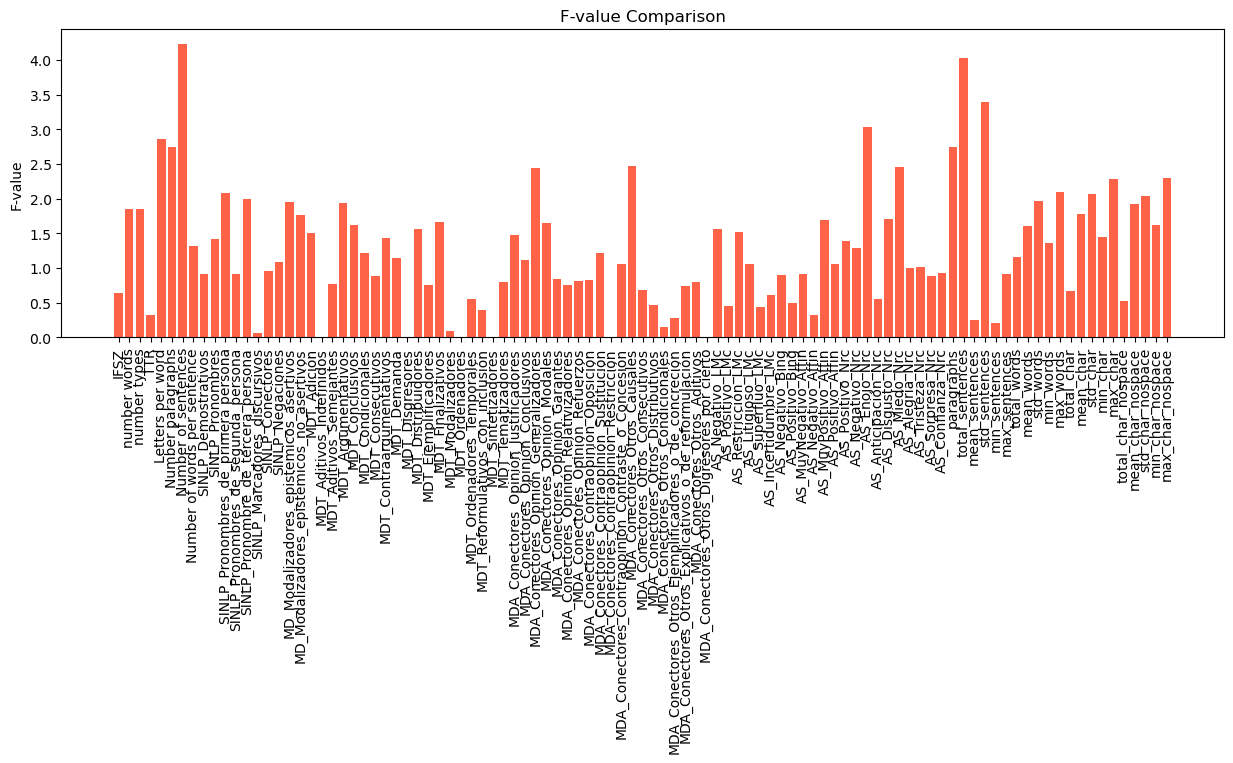

In [39]:
# Import f_classif from Scikit-learn
from sklearn.feature_selection import f_classif
# Create f_classif object to calculate F-value
f_value = f_classif(X, y)
feature_names = X.columns
# Print the name and F-value of each feature
for feature,v in zip(feature_names, f_value[0]):
    if feature not in d:
        d[feature] = []
    d[feature].append(float(v))
plt.figure(figsize=(15,4))
plt.bar(x=feature_names, height=f_value[0], color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('F-value')
plt.title('F-value Comparison')
plt.show()
    

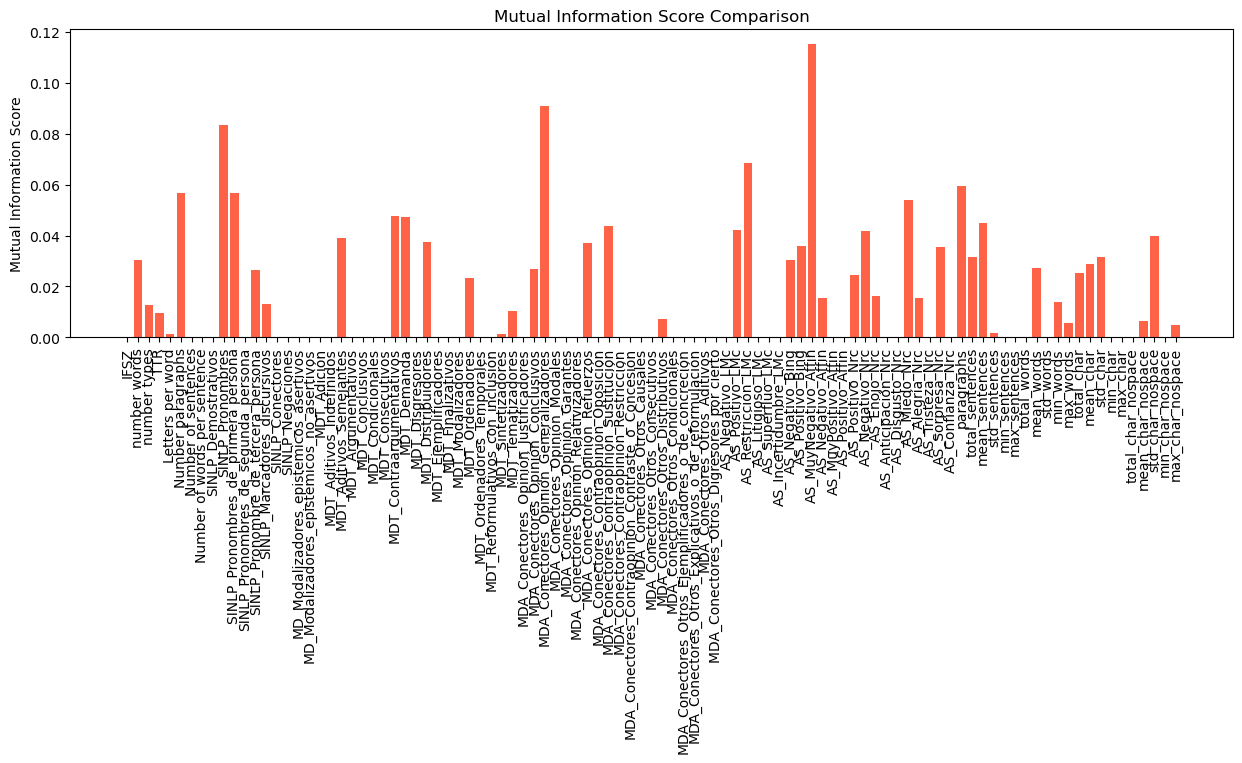

In [40]:
from sklearn.feature_selection import mutual_info_classif
# Create mutual_info_classif object to calculate mutual information
MI_score = mutual_info_classif(X, y, random_state=0)
# Print the name and mutual information score of each feature
for feature,v in zip(feature_names, MI_score):
    if feature not in d:
        d[feature] = []
    d[feature].append(float(v))
# Create a bar chart for visualizing the mutual information scores
plt.figure(figsize=(15,4))
plt.bar(x=feature_names, height=MI_score, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')

plt.show()

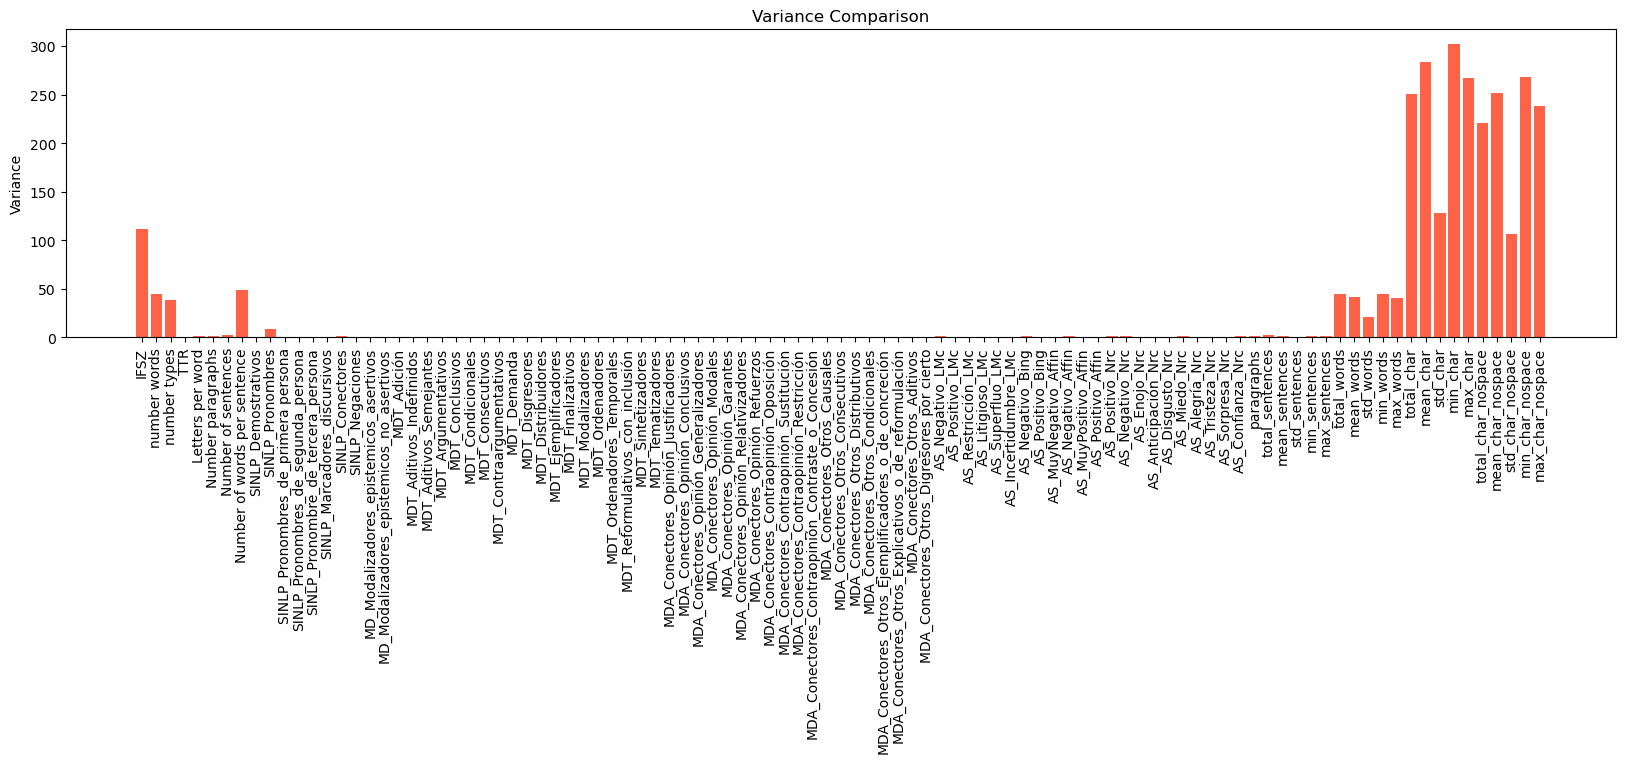

In [41]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
# Perform variance thresholding
selector.fit_transform(X)
## Print the name and variance of each feature
for feature,v in zip(feature_names, selector.variances_):
    if feature not in d:
        d[feature] = []
    d[feature].append(float(v))
# Create a bar chart for visualizing the variances
plt.figure(figsize=(20,4))
plt.bar(x=feature_names, height=selector.variances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title('Variance Comparison')

plt.show()

[[4.025169777019717, 'total_sentences'], [3.39348908340448, 'std_sentences'], [3.0288979718002667, 'AS_Enojo_Nrc'], [2.7388470932772373, 'paragraphs'], [2.457115148208829, 'AS_Miedo_Nrc'], [2.2948992642297905, 'max_char_nospace'], [2.281530015761688, 'max_char'], [2.100867292226781, 'max_words'], [2.0612533596638403, 'std_char'], [2.0438476316492658, 'std_char_nospace']]
['total_sentences', 'std_sentences', 'AS_Enojo_Nrc', 'paragraphs', 'AS_Miedo_Nrc', 'max_char_nospace', 'max_char', 'max_words', 'std_char', 'std_char_nospace']
[4.025169777019717, 3.39348908340448, 3.0288979718002667, 2.7388470932772373, 2.457115148208829, 2.2948992642297905, 2.281530015761688, 2.100867292226781, 2.0612533596638403, 2.0438476316492658]


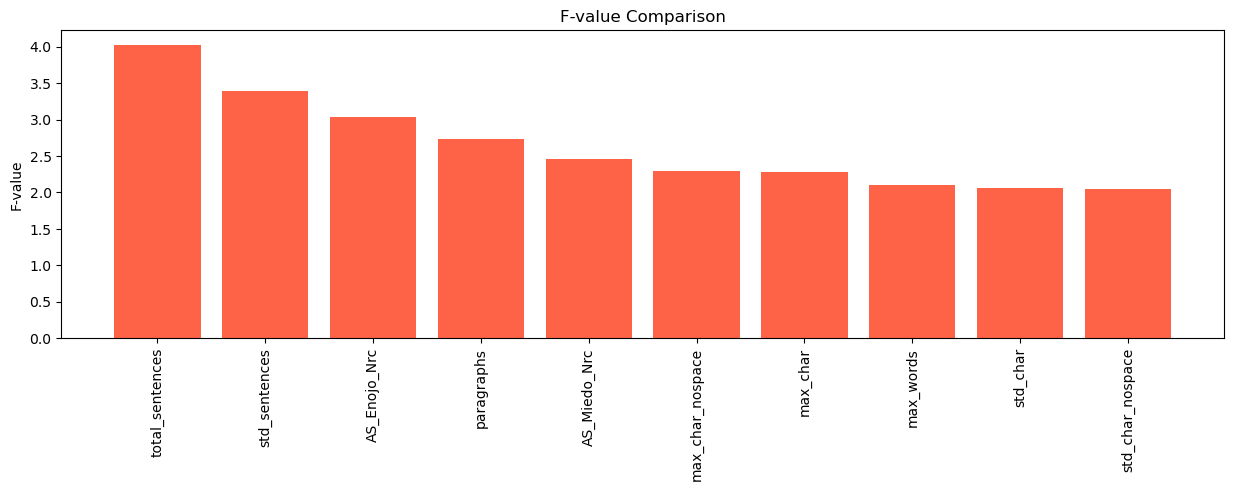

[[0.11514858276704443, 'AS_MuyNegativo_Affin'], [0.09086973626405115, 'MDA_Conectores_Opinión_Generalizadores'], [0.08354549080374518, 'SINLP_Pronombres'], [0.06837608307981125, 'AS_Restricción_LMc'], [0.05948814571737682, 'paragraphs'], [0.056634683167426925, 'Number paragraphs'], [0.05656246477401705, 'SINLP_Pronombres_de_primera persona'], [0.05402313406157777, 'AS_Miedo_Nrc'], [0.047534568670870136, 'MDT_Contraargumentativos'], [0.04733402793600705, 'MDT_Demanda']]
['AS_MuyNegativo_Affin', 'MDA_Conectores_Opinión_Generalizadores', 'SINLP_Pronombres', 'AS_Restricción_LMc', 'paragraphs', 'Number paragraphs', 'SINLP_Pronombres_de_primera persona', 'AS_Miedo_Nrc', 'MDT_Contraargumentativos', 'MDT_Demanda']
[0.11514858276704443, 0.09086973626405115, 0.08354549080374518, 0.06837608307981125, 0.05948814571737682, 0.056634683167426925, 0.05656246477401705, 0.05402313406157777, 0.047534568670870136, 0.04733402793600705]


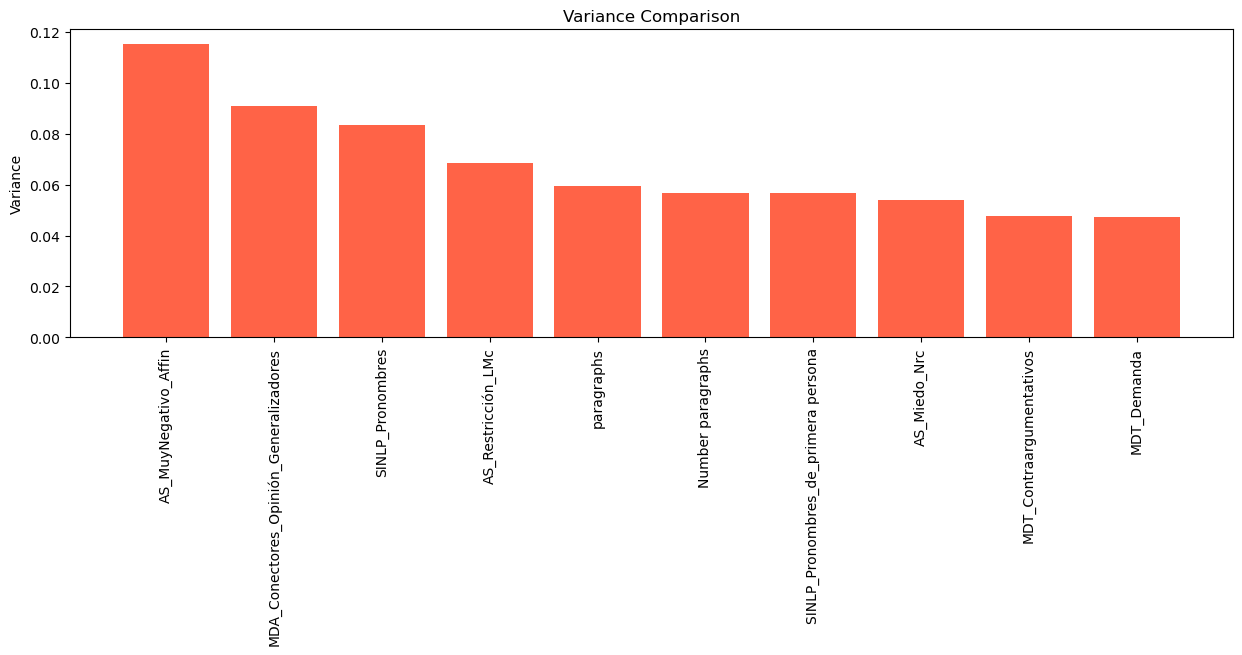

[[302.0, 'min_char'], [283.1111, 'mean_char'], [268.0, 'min_char_nospace'], [267.0, 'max_char'], [251.6667, 'mean_char_nospace'], [251.0, 'total_char'], [238.0, 'max_char_nospace'], [221.0, 'total_char_nospace'], [128.5, 'std_char'], [111.3301, 'IFSZ']]


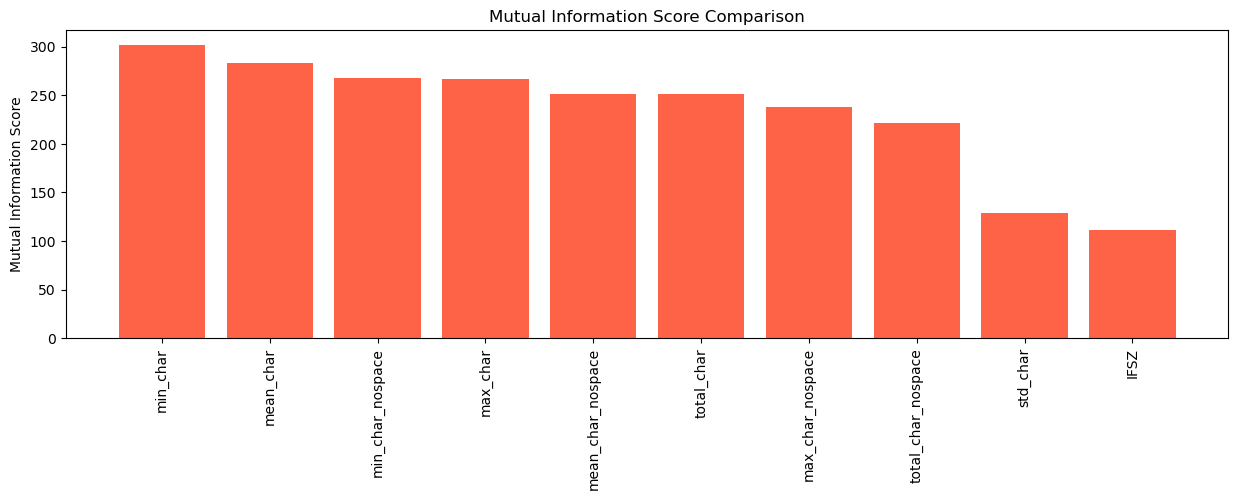

['total_sentences', 'std_sentences', 'AS_Enojo_Nrc', 'paragraphs', 'AS_Miedo_Nrc', 'max_char_nospace', 'max_char', 'max_words', 'std_char', 'std_char_nospace']
['AS_MuyNegativo_Affin', 'MDA_Conectores_Opinión_Generalizadores', 'SINLP_Pronombres', 'AS_Restricción_LMc', 'paragraphs', 'Number paragraphs', 'SINLP_Pronombres_de_primera persona', 'AS_Miedo_Nrc', 'MDT_Contraargumentativos', 'MDT_Demanda']
['min_char', 'mean_char', 'min_char_nospace', 'max_char', 'mean_char_nospace', 'total_char', 'max_char_nospace', 'total_char_nospace', 'std_char', 'IFSZ']


In [42]:
#d
l_anova = []
l_variance_th = []
l_mutual = []
for k in d:
    l_anova.append([d[k][0],k])
    l_variance_th.append([d[k][1],k])
    l_mutual.append([d[k][2],k])

l_anova.sort()
l_anova.reverse()
l_variance_th.sort()
l_variance_th.reverse()
l_mutual.sort()
l_mutual.reverse()

print("============")    
print(l_anova[0:10])
l_anova_x = [x for y,x in l_anova[0:10]]
l_anova_y = [y for y,x in l_anova[0:10]]
print(l_anova_x)
print(l_anova_y)
plt.figure(figsize=(15,4))
plt.bar(x=l_anova_x, height=l_anova_y, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('F-value')
plt.title('F-value Comparison')
plt.show()

print("============")
print(l_variance_th[0:10])
l_variance_th_x = [x for y,x in l_variance_th[0:10]]
l_variance_th_y = [y for y,x in l_variance_th[0:10]]
print(l_variance_th_x)
print(l_variance_th_y)
plt.figure(figsize=(15,4))
plt.bar(x=l_variance_th_x, height=l_variance_th_y, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title('Variance Comparison')
plt.show()

print("============")
print(l_mutual[0:10])
l_mutual_x = [x for y,x in l_mutual[0:10]]
l_mutual_y = [y for y,x in l_mutual[0:10]]
plt.figure(figsize=(15,4))
plt.bar(x=l_mutual_x, height=l_mutual_y, color='tomato')
plt.xticks(rotation='vertical')

plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')
plt.show()
print("============")


l_anova = [x for y,x in l_anova]
l_anova = l_anova[0:10]
l_variance_th = [x for y,x in l_variance_th]
l_variance_th = l_variance_th[0:10]
l_mutual = [x for y,x in l_mutual]
l_mutual = l_mutual[0:10]

print("============")    
print(l_anova)
print(l_variance_th)
print(l_mutual)

In [203]:

FS = "liar_features"
if FS == "anova":
    X = X[l_anova]
if FS == "variance":
    X = X[l_variance_th]
if FS == "mutual":
    X = X[l_mutual]
if FS == "liar_features":
    lista_columnas = ['paragraphs','total_sentences','mean_sentences','std_sentences','min_sentences',
                  'max_sentences','total_words','mean_words','std_words','min_words','max_words',
                  'total_char','mean_char','std_char','min_char','max_char','total_char_nospace',
                  'mean_char_nospace','std_char_nospace','min_char_nospace','max_char_nospace']
    X = X[l_columnas]

    
X

,paragraphs,total_sentences,mean_sentences,std_sentences,min_sentences,max_sentences,total_words,mean_words,std_words,min_words,...,total_char,mean_char,std_char,min_char,max_char,total_char_nospace,mean_char_nospace,std_char_nospace,min_char_nospace,max_char_nospace
0,1.0,2.0,2.0,0.0,2.0,2.0,38.0,19.0000,15.0000,4.0,...,205.0,102.5000,79.5000,23.0,182.0,172.0,86.0000,63.0000,23.0,149.0
1,1.0,2.0,2.0,0.0,2.0,2.0,26.0,13.0000,9.0000,4.0,...,138.0,69.0000,46.0000,23.0,115.0,117.0,58.5000,35.5000,23.0,94.0
2,1.0,2.0,2.0,0.0,2.0,2.0,21.0,10.5000,7.5000,3.0,...,143.0,71.5000,56.5000,15.0,128.0,124.0,62.0000,49.0000,13.0,111.0
3,2.0,4.0,2.0,1.0,1.0,3.0,51.0,12.7500,9.0933,4.0,...,290.0,72.5000,56.8001,14.0,151.0,246.0,61.5000,47.1036,11.0,127.0
4,1.0,2.0,2.0,0.0,2.0,2.0,25.0,12.5000,8.5000,4.0,...,165.0,82.5000,59.5000,23.0,142.0,144.0,72.0000,49.0000,23.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2.0,2.0,1.0,0.0,1.0,1.0,34.0,17.0000,1.0000,16.0,...,198.0,99.0000,3.0000,96.0,102.0,166.0,83.0000,2.0000,81.0,85.0
296,1.0,1.0,1.0,0.0,1.0,1.0,35.0,35.0000,0.0000,35.0,...,303.0,303.0000,0.0000,303.0,303.0,269.0,269.0000,0.0000,269.0,269.0
297,2.0,3.0,1.5,0.5,1.0,2.0,44.0,14.6667,7.5425,4.0,...,295.0,98.3333,53.3250,23.0,139.0,257.0,85.6667,44.3797,23.0,120.0
298,6.0,9.0,1.5,0.5,1.0,2.0,34.0,3.7778,4.2105,0.0,...,260.0,28.8889,23.7928,1.0,63.0,229.0,25.4444,19.9617,1.0,54.0


In [204]:
from sklearn.preprocessing import StandardScaler
#X_statistics_scaled_features = StandardScaler().fit_transform(X_statistics.values)
#X_statistics_scaled_features
X_voc_statistics_scaled_features = StandardScaler().fit_transform(X)
X_voc_statistics_scaled_features

array([[-0.61617998, -0.45455736,  0.26260375, ...,  1.68682897,
        -0.61700328,  0.80055598],
       [-0.61617998, -0.45455736,  0.26260375, ...,  0.48010564,
        -0.61700328, -0.42889056],
       [-0.61617998, -0.45455736,  0.26260375, ...,  1.07249709,
        -0.79688762, -0.04887981],
       ...,
       [ 0.12620554,  0.12572863, -0.23945163, ...,  0.86975441,
        -0.61700328,  0.15230235],
       [ 3.09574762,  3.60744457, -0.23945163, ..., -0.20172814,
        -1.01274883, -1.3230335 ],
       [ 0.12620554, -0.45455736, -0.74150701, ...,  0.3484631 ,
         0.40833745,  0.71114168]])

In [180]:
y

['NO RUMOR',
 'NO RUMOR',
 'FALSO',
 'FALSO',
 'NO RUMOR',
 'FALSO',
 'VERDADERO',
 'NO RUMOR',
 'FALSO',
 'NO RUMOR',
 'VERDADERO',
 'VERDADERO',
 'FALSO',
 'VERDADERO',
 'VERDADERO',
 'VERDADERO',
 'FALSO',
 'NO RUMOR',
 'VERDADERO',
 'NO RUMOR',
 'NO VERIFICADO',
 'NO RUMOR',
 'NO RUMOR',
 'VERDADERO',
 'VERDADERO',
 'NO RUMOR',
 'FALSO',
 'NO VERIFICADO',
 'VERDADERO',
 'FALSO',
 'VERDADERO',
 'NO RUMOR',
 'FALSO',
 'NO RUMOR',
 'NO RUMOR',
 'VERDADERO',
 'NO VERIFICADO',
 'NO RUMOR',
 'NO RUMOR',
 'FALSO',
 'NO RUMOR',
 'NO VERIFICADO',
 'VERDADERO',
 'VERDADERO',
 'VERDADERO',
 'VERDADERO',
 'NO RUMOR',
 'NO RUMOR',
 'NO VERIFICADO',
 'NO RUMOR',
 'NO VERIFICADO',
 'VERDADERO',
 'VERDADERO',
 'NO VERIFICADO',
 'NO RUMOR',
 'VERDADERO',
 'NO RUMOR',
 'VERDADERO',
 'VERDADERO',
 'NO RUMOR',
 'NO RUMOR',
 'NO RUMOR',
 'NO RUMOR',
 'NO RUMOR',
 'VERDADERO',
 'NO RUMOR',
 'VERDADERO',
 'VERDADERO',
 'FALSO',
 'NO VERIFICADO',
 'FALSO',
 'NO RUMOR',
 'NO RUMOR',
 'FALSO',
 'NO VERIFICA

               precision    recall  f1-score   support

        FALSO       0.11      0.11      0.11         9
     NO RUMOR       0.39      0.24      0.30        29
NO VERIFICADO       0.09      0.33      0.14         3
    VERDADERO       0.32      0.37      0.34        19

     accuracy                           0.27        60
    macro avg       0.23      0.26      0.22        60
 weighted avg       0.31      0.27      0.28        60

[[0.14, 15, 'max_char'], [0.11, 12, 'mean_char'], [0.1, 16, 'total_char_nospace'], [0.09, 7, 'mean_words'], [0.08, 14, 'min_char'], [0.06, 10, 'max_words'], [0.06, 8, 'std_words'], [0.06, 6, 'total_words'], [0.05, 11, 'total_char'], [0.05, 2, 'mean_sentences'], [0.03, 17, 'mean_char_nospace'], [0.03, 13, 'std_char'], [0.03, 3, 'std_sentences'], [0.03, 0, 'paragraphs'], [0.02, 20, 'max_char_nospace'], [0.02, 19, 'min_char_nospace'], [0.02, 18, 'std_char_nospace'], [0.01, 9, 'min_words'], [0.01, 5, 'max_sentences'], [0.0, 4, 'min_sentences'], [0.0, 1, '

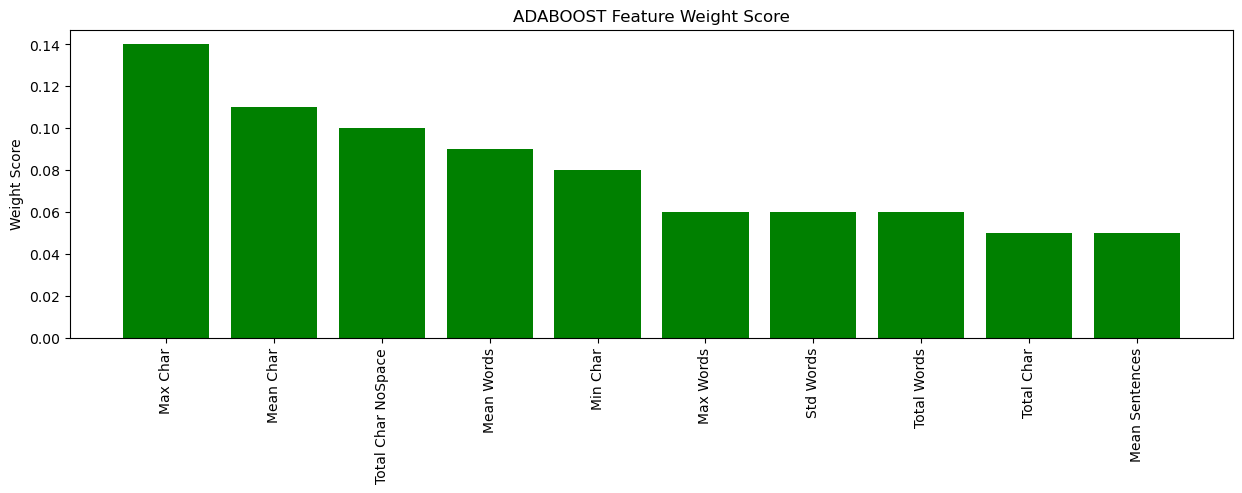

               precision    recall  f1-score   support

        FALSO       0.22      0.22      0.22         9
     NO RUMOR       0.50      0.30      0.37        30
NO VERIFICADO       0.09      0.33      0.14         3
    VERDADERO       0.36      0.44      0.40        18

     accuracy                           0.33        60
    macro avg       0.29      0.32      0.29        60
 weighted avg       0.40      0.33      0.35        60

[[0.07683309014079073, 15, 'max_char'], [0.07546007263392894, 11, 'total_char'], [0.07219438109132169, 6, 'total_words'], [0.068509066593414, 16, 'total_char_nospace'], [0.06172011638503807, 20, 'max_char_nospace'], [0.061000688528938994, 17, 'mean_char_nospace'], [0.06064202515415068, 12, 'mean_char'], [0.060007597960840785, 7, 'mean_words'], [0.05906928833468212, 19, 'min_char_nospace'], [0.05440949039651822, 14, 'min_char'], [0.054285846664235485, 10, 'max_words'], [0.046417304425869665, 18, 'std_char_nospace'], [0.0443626852602818, 9, 'min_words']

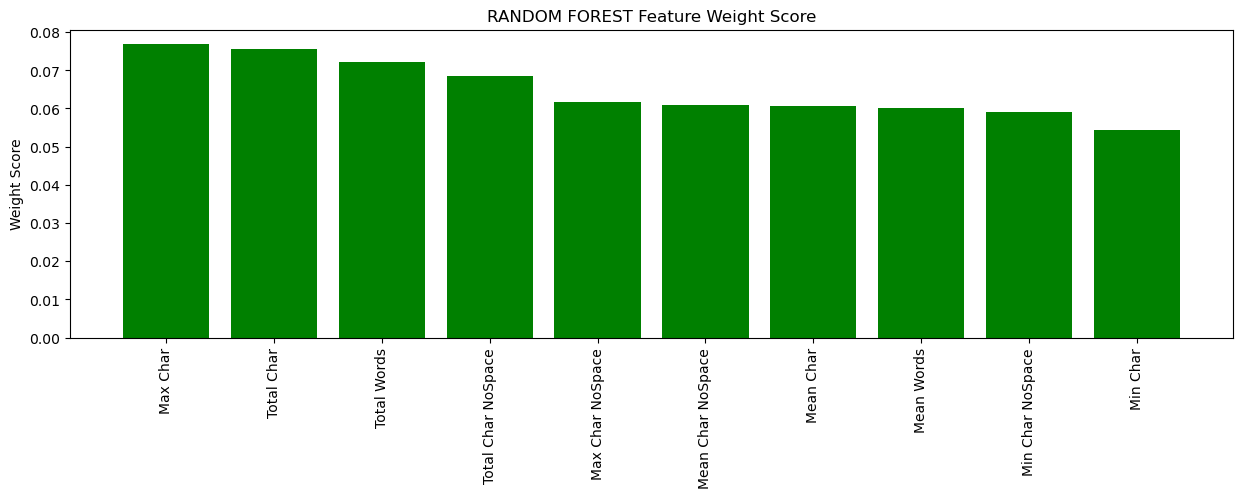

              precision    recall  f1-score   support

           0       0.22      0.22      0.22         9
           1       0.56      0.36      0.43        28
           2       0.09      0.25      0.13         4
           3       0.41      0.47      0.44        19

    accuracy                           0.37        60
   macro avg       0.32      0.33      0.31        60
weighted avg       0.43      0.37      0.38        60

[[0.11456698, 1, 'total_sentences'], [0.058647085, 2, 'mean_sentences'], [0.055145174, 12, 'mean_char'], [0.05170132, 20, 'max_char_nospace'], [0.05146473, 9, 'min_words'], [0.050221544, 6, 'total_words'], [0.050023735, 3, 'std_sentences'], [0.047980137, 18, 'std_char_nospace'], [0.047052726, 10, 'max_words'], [0.04690454, 8, 'std_words'], [0.044614702, 15, 'max_char'], [0.04310401, 14, 'min_char'], [0.042002324, 0, 'paragraphs'], [0.040856466, 11, 'total_char'], [0.040507004, 16, 'total_char_nospace'], [0.04032802, 7, 'mean_words'], [0.0386778, 13, 'std_char

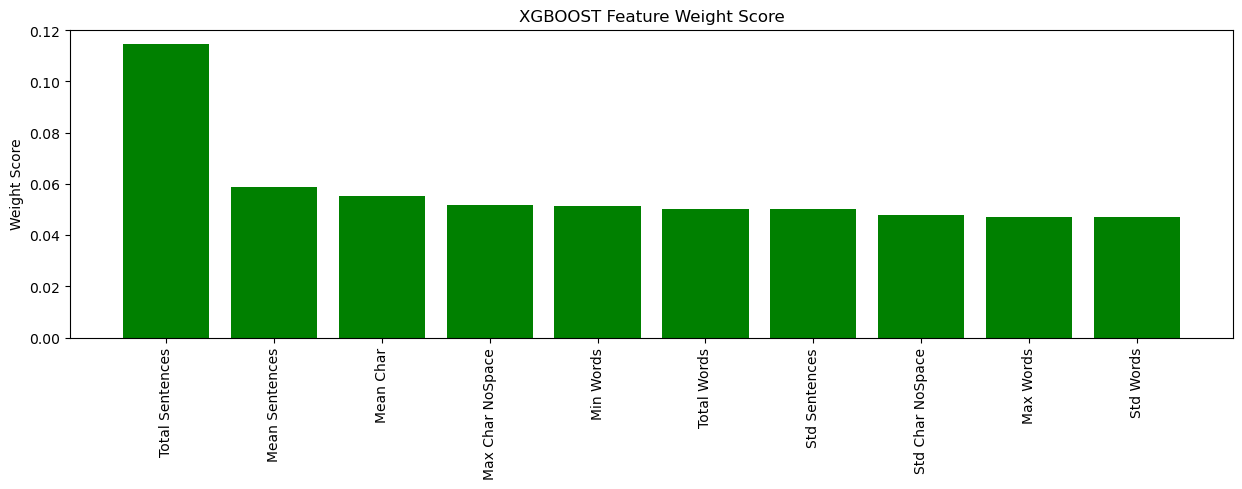

In [240]:
l_feat_ada,l_feat_rf, l_feat_xgb =  features_per_model(X,y,lista_columnas)

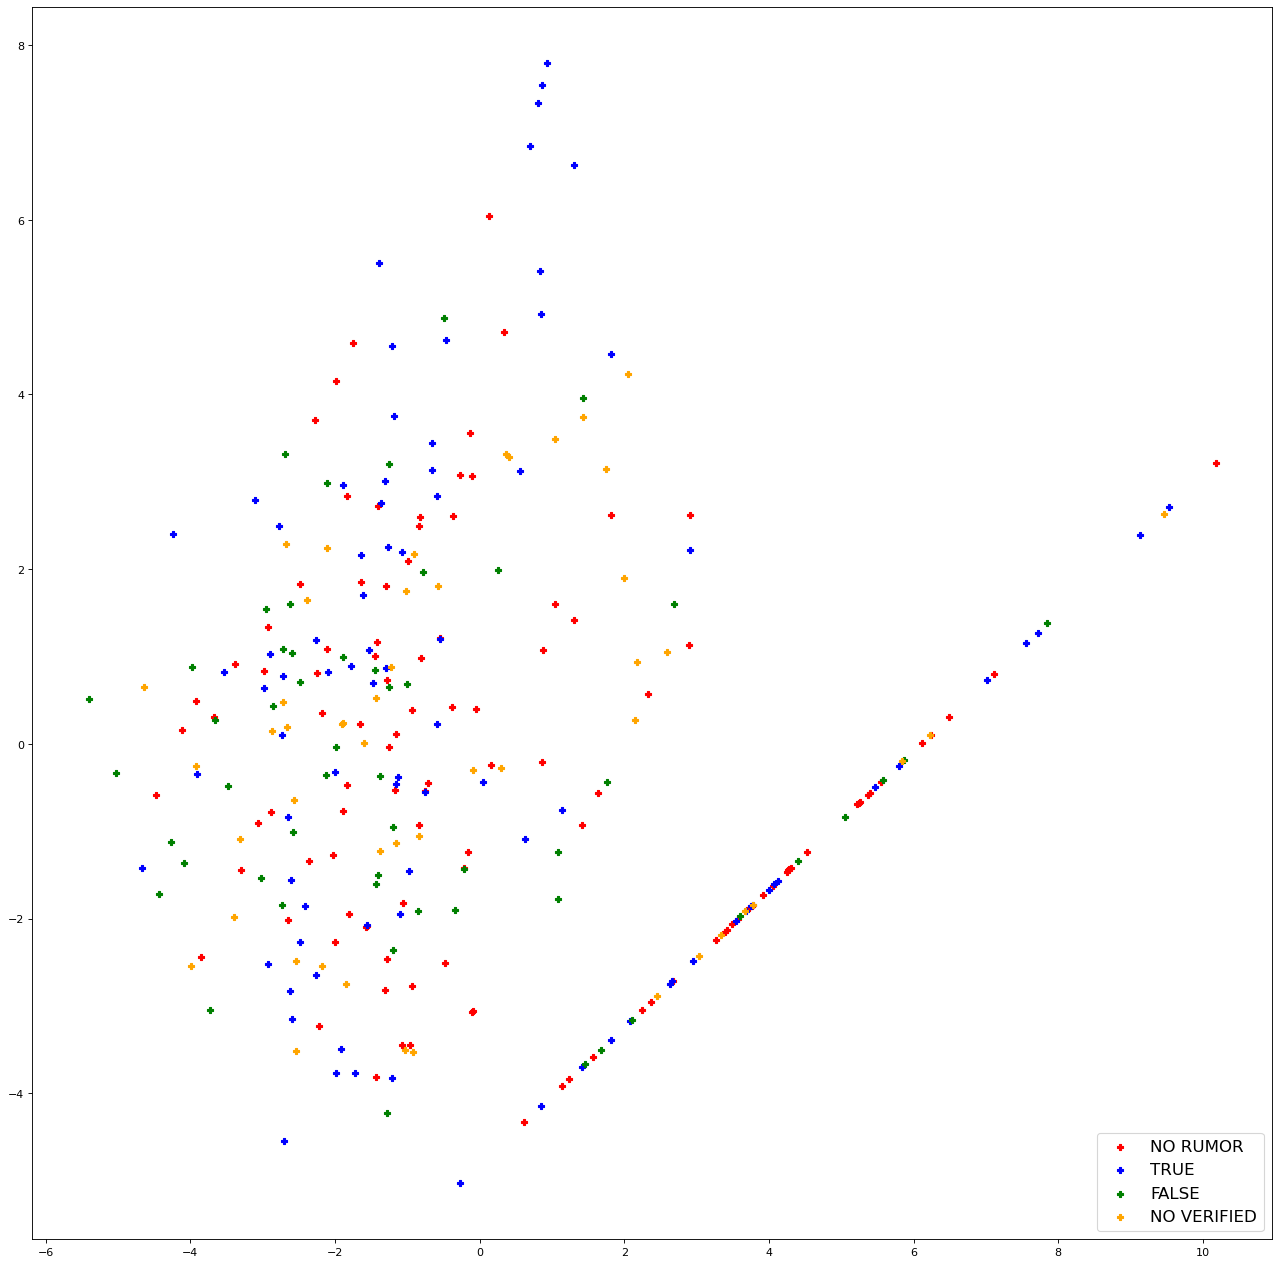

In [101]:
import matplotlib.pyplot as plt

import plotly.express as px
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
def legend_without_duplicate_labels(figure):
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    figure.legend(by_label.values(), by_label.keys(), loc='lower right',fontsize="15")

pca = PCA(n_components=2)
components = pca.fit_transform(X_voc_statistics_scaled_features)


lista_NRum_X = []
lista_NRum_Y = []
lista_Ve_X = []
lista_Ve_Y = []
lista_Fa_X = []
lista_Fa_Y = []
lista_NVer_X = []
lista_NVer_Y = []

figure(figsize=(20, 20), dpi=80)


for l in range(0,len(y)):
    if y[l] == "NO RUMOR":
        lista_NRum_X.append(components[l,0])
        lista_NRum_Y.append(components[l,1])
    if y[l] == "VERDADERO":
        lista_Ve_X.append(components[l,0])
        lista_Ve_Y.append(components[l,1])
    if y[l] == "FALSO":
        lista_Fa_X.append(components[l,0])
        lista_Fa_Y.append(components[l,1])
    if y[l] == "NO VERIFICADO":
        lista_NVer_X.append(components[l,0])
        lista_NVer_Y.append(components[l,1])

plt.scatter(lista_NRum_X, lista_NRum_Y, label='NO RUMOR', c='red', marker="P") 
plt.scatter(lista_Ve_X, lista_Ve_Y, label='TRUE', c='blue', marker="P") 
plt.scatter(lista_Fa_X, lista_Fa_Y, label='FALSE', c='green', marker="P") 
plt.scatter(lista_NVer_X, lista_NVer_Y, label='NO VERIFIED', c='orange', marker="P") 

legend_without_duplicate_labels(plt)

plt.show()

In [94]:

if FS == "anova":
    components_ = X_voc_statistics_scaled_features
if FS == "variance":
    components_ = X_voc_statistics_scaled_features
if FS == "mutual":
    components_ = X_voc_statistics_scaled_features
if FS == "liar_features":
    components_ = X_voc_statistics_scaled_features
if FS == "all":
    pca_ = PCA(n_components=10)
    components_ = pca_.fit_transform(X_voc_statistics_scaled_features)



##pca_ = PCA(n_components=10)
#components_ = pca_.fit_transform(X_voc_statistics_scaled_features)
#components_ = 
#len(components_[0])
print(FS)
len(components_[0])

liar_features


21

In [232]:
ML = "rf"
XGBOOST_OPT = False
if ML=="xgboost":
    XGBOOST_OPT = True
    components_ = X[l_feat_xgb]
if ML=="ada":
    components_ = X[l_feat_ada]
if ML=="rf":
    components_ = X[l_feat_rf]

from sklearn import svm, datasets
from sklearn.ensemble import AdaBoostClassifier
from imblearn.ensemble import BalancedBaggingClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from collections import Counter

X_train, X_test, y_train, y_test = model_selection.train_test_split(components_, y, train_size=0.80, test_size=0.20)

In [233]:


instance_counts_labels = Counter(y_train)
print("Instance counts TRAIN:", instance_counts_labels)
instance_counts_labels = Counter(y_test)
print("Instance counts TEST:", instance_counts_labels)

Instance counts TRAIN: Counter({'NO RUMOR': 92, 'VERDADERO': 69, 'FALSO': 41, 'NO VERIFICADO': 38})
Instance counts TEST: Counter({'NO RUMOR': 19, 'VERDADERO': 18, 'FALSO': 12, 'NO VERIFICADO': 11})


In [234]:

if XGBOOST_OPT == False:
    if ML == "svm":
        cl_svm = svm.SVC(kernel='rbf',C=1).fit(X_train, y_train)
        y_pred = cl_svm.predict(X_test)
    if ML == "rf":
        clf_RF=RandomForestClassifier(n_estimators=40).fit(X_train, y_train)
        y_pred = clf_RF.predict(X_test)
    
    if ML=="ada":
        clf_ADA_samp = AdaBoostClassifier(n_estimators=100).fit(X_train, y_train)
        y_pred = clf_ADA_samp.predict(X_test)
    
    if ML=="Balanced":
        clf_BAL_BAGG = BalancedBaggingClassifier()
        clf_BAL_BAGG.fit(X_train, y_train)
        y_pred = clf_BAL_BAGG.predict(X_test)
        
        
else:
    ML = "xgboost"
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()

    y_train = le.fit_transform(y_train)
    y_test = le.fit_transform(y_test)
    xg_reg = xgb.XGBClassifier().fit(X_train, y_train)
    y_pred = xg_reg.predict(X_test)
y_pred

array(['NO RUMOR', 'FALSO', 'NO RUMOR', 'NO RUMOR', 'NO RUMOR', 'FALSO',
       'NO RUMOR', 'VERDADERO', 'NO RUMOR', 'NO RUMOR', 'VERDADERO',
       'NO RUMOR', 'NO RUMOR', 'NO VERIFICADO', 'FALSO', 'VERDADERO',
       'FALSO', 'NO VERIFICADO', 'NO RUMOR', 'VERDADERO', 'NO RUMOR',
       'NO VERIFICADO', 'VERDADERO', 'VERDADERO', 'NO RUMOR', 'NO RUMOR',
       'FALSO', 'NO VERIFICADO', 'NO RUMOR', 'VERDADERO', 'NO RUMOR',
       'NO RUMOR', 'VERDADERO', 'NO VERIFICADO', 'NO RUMOR', 'VERDADERO',
       'VERDADERO', 'FALSO', 'NO VERIFICADO', 'NO RUMOR', 'VERDADERO',
       'NO RUMOR', 'FALSO', 'NO RUMOR', 'VERDADERO', 'VERDADERO',
       'NO RUMOR', 'NO RUMOR', 'NO RUMOR', 'NO RUMOR', 'NO RUMOR',
       'VERDADERO', 'VERDADERO', 'VERDADERO', 'VERDADERO',
       'NO VERIFICADO', 'NO RUMOR', 'NO RUMOR', 'NO RUMOR', 'VERDADERO'],
      dtype='<U13')

In [235]:
_accuracy = accuracy_score(y_test, y_pred)
_f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy ',ML, "%.2f" % (_accuracy*100))
print('F1 ',ML, "%.2f" % (_f1*100))


Accuracy  rf 36.67
F1  rf 34.77


In [236]:
if XGBOOST_OPT == True:
    y_test = le.inverse_transform(y_test)
    y_pred = le.inverse_transform(y_pred)

[[11  1  3  4]
 [ 5  2  4  1]
 [ 8  3  7  0]
 [ 4  1  4  2]]
               precision    recall  f1-score   support

        FALSO       0.29      0.17      0.21        12
     NO RUMOR       0.39      0.58      0.47        19
NO VERIFICADO       0.29      0.18      0.22        11
    VERDADERO       0.39      0.39      0.39        18

     accuracy                           0.37        60
    macro avg       0.34      0.33      0.32        60
 weighted avg       0.35      0.37      0.35        60

{'FALSO': {'precision': 0.2857142857142857, 'recall': 0.16666666666666666, 'f1-score': 0.2105263157894737, 'support': 12}, 'NO RUMOR': {'precision': 0.39285714285714285, 'recall': 0.5789473684210527, 'f1-score': 0.46808510638297873, 'support': 19}, 'NO VERIFICADO': {'precision': 0.2857142857142857, 'recall': 0.18181818181818182, 'f1-score': 0.2222222222222222, 'support': 11}, 'VERDADERO': {'precision': 0.3888888888888889, 'recall': 0.3888888888888889, 'f1-score': 0.3888888888888889, 'support

array([[[24, 17],
        [ 8, 11]],

       [[43,  5],
        [10,  2]],

       [[31, 11],
        [11,  7]],

       [[44,  5],
        [ 9,  2]]], dtype=int64)

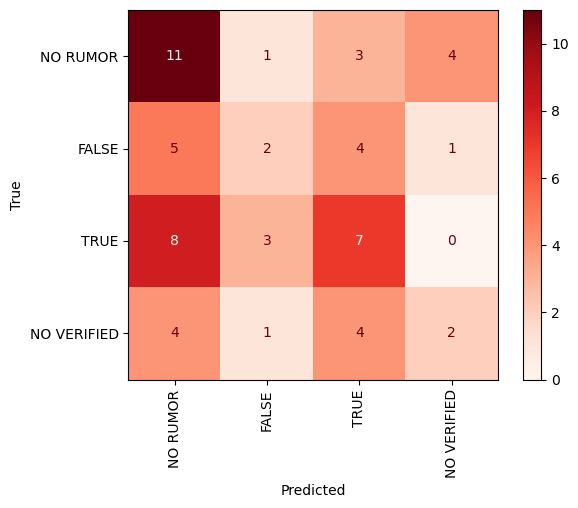

In [238]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=["NO RUMOR","FALSO","VERDADERO","NO VERIFICADO"])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NO RUMOR","FALSE","TRUE","NO VERIFIED"])
disp.plot(cmap="Reds", xticks_rotation="vertical")
disp.ax_.set(xlabel='Predicted', ylabel='True')




from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)
report = classification_report(y_test, y_pred, output_dict=True)
print(report)
print("IMBALANBCED")
print(ML," & ",
       round(report['accuracy'],3)," & ",
       round(report['weighted avg']['precision'],3)," & ",
       round(report['weighted avg']['recall'],3)," & ",
       round(report['weighted avg']['f1-score'],3)," \\\\* ",
     
     )

from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, y_pred, labels=["NO RUMOR","FALSO","VERDADERO","NO VERIFICADO"])

In [222]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
samp = "RUS"
if samp == "SMOTE": 
    sample = SMOTE()
if samp == "ROS": 
    sample = RandomOverSampler()
if samp == "RUS": 
    sample = RandomUnderSampler()
    
X_sampled, y_sampled = sample.fit_resample(components_, y)

instance_counts_labels = Counter(y_sampled)
print("Instance counts y sampled:", instance_counts_labels)

X_train_samp, X_test_samp, y_train_samp, y_test_samp = model_selection.train_test_split(X_sampled, y_sampled, train_size=0.80, test_size=0.20)


instance_counts_labels = Counter(y_train_samp)
print("Instance counts y_train_samp sampled:", instance_counts_labels)

instance_counts_labels = Counter(y_test_samp)
print("Instance counts y_train_samp sampled:", instance_counts_labels)


if XGBOOST_OPT == False:
    if ML == "svm":
        clf_rbf_samp = svm.SVC(kernel='rbf',C=1).fit(X_train_samp, y_train_samp)
        y_pred_samp = clf_rbf_samp.predict(X_test)
    if ML == "rf":
        clf_RF_samp=RandomForestClassifier(n_estimators=40).fit(X_train_samp, y_train_samp)
        y_pred_samp = clf_RF_samp.predict(X_test)
    if ML=="ada":
        clf_ADA_samp = AdaBoostClassifier(n_estimators=100).fit(X_train_samp, y_train_samp)
        y_pred_samp = clf_ADA_samp.predict(X_test)
else:

    y_train_samp = le.fit_transform(y_train_samp)
    y_test = le.fit_transform(y_test)
    xg_reg = xgb.XGBClassifier().fit(X_train_samp, y_train_samp)

    y_pred_samp = xg_reg.predict(X_test)


Instance counts y sampled: Counter({'FALSO': 49, 'NO RUMOR': 49, 'NO VERIFICADO': 49, 'VERDADERO': 49})
Instance counts y_train_samp sampled: Counter({'VERDADERO': 43, 'FALSO': 38, 'NO VERIFICADO': 38, 'NO RUMOR': 37})
Instance counts y_train_samp sampled: Counter({'NO RUMOR': 12, 'NO VERIFICADO': 11, 'FALSO': 11, 'VERDADERO': 6})


In [223]:
_accuracy = accuracy_score(y_test, y_pred_samp)
_f1 = f1_score(y_test, y_pred_samp, average='weighted')
print('Accuracy ',ML, "%.2f" % (_accuracy*100))
print('F1 ',ML,  "%.2f" % (_f1*100))

Accuracy  rf 66.67
F1  rf 66.19


In [224]:
if XGBOOST_OPT == True:
    y_test = le.inverse_transform(y_test)
    y_pred_samp = le.inverse_transform(y_pred_samp)

    instance_counts_labels = Counter(y_train_samp)
    print("Instance counts TRAIN sampled:", instance_counts_labels)

    instance_counts_labels = Counter(y_test)
    print("Instance counts TEST sampled:", instance_counts_labels)

[[15  4  3  3]
 [ 2  5  2  1]
 [ 3  0  8  1]
 [ 0  0  1 12]]
               precision    recall  f1-score   support

        FALSO       0.56      0.50      0.53        10
     NO RUMOR       0.75      0.60      0.67        25
NO VERIFICADO       0.71      0.92      0.80        13
    VERDADERO       0.57      0.67      0.62        12

     accuracy                           0.67        60
    macro avg       0.65      0.67      0.65        60
 weighted avg       0.67      0.67      0.66        60

{'FALSO': {'precision': 0.5555555555555556, 'recall': 0.5, 'f1-score': 0.5263157894736842, 'support': 10}, 'NO RUMOR': {'precision': 0.75, 'recall': 0.6, 'f1-score': 0.6666666666666665, 'support': 25}, 'NO VERIFICADO': {'precision': 0.7058823529411765, 'recall': 0.9230769230769231, 'f1-score': 0.8000000000000002, 'support': 13}, 'VERDADERO': {'precision': 0.5714285714285714, 'recall': 0.6666666666666666, 'f1-score': 0.6153846153846153, 'support': 12}, 'accuracy': 0.6666666666666666, 'macro a

array([[[30,  5],
        [10, 15]],

       [[46,  4],
        [ 5,  5]],

       [[42,  6],
        [ 4,  8]],

       [[42,  5],
        [ 1, 12]]], dtype=int64)

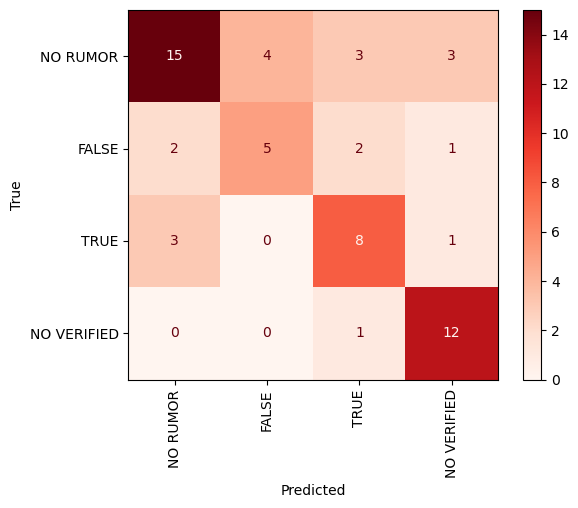

In [225]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_samp, labels=["NO RUMOR","FALSO","VERDADERO","NO VERIFICADO"])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NO RUMOR","FALSE","TRUE","NO VERIFIED"])
disp.plot(cmap="Reds", xticks_rotation="vertical")
disp.ax_.set(xlabel='Predicted', ylabel='True')

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_samp)
print(report)
report = classification_report(y_test, y_pred_samp, output_dict=True)
print(report)
print("IMBALANBCED")
print(ML," & ",
       round(report['accuracy'],3)," & ",
       round(report['weighted avg']['precision'],3)," & ",
       round(report['weighted avg']['recall'],3)," & ",
       round(report['weighted avg']['f1-score'],3)," \\\\* ",
     
     )

from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, y_pred_samp, labels=["NO RUMOR","FALSO","VERDADERO","NO VERIFICADO"])